In [1]:
from vllm import LLM, SamplingParams
from math_verify import parse, verify

import pandas as pd
import uuid
import base64
import os



import sys
sys.path.append("..")
from utils import parse_answers

/opt/anaconda/envs/diff-direction/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INFO 12-16 00:50:19 [__init__.py:241] Automatically detected platform cuda.


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [ ]:
MODEL_NAME="Qwen/Qwen2.5-Math-7B-Instruct"
MODEL_ALIAS = MODEL_NAME.split("/")[-1]
DATASET_NAME = "E2H-AMC"
PROBE_SOURCE = "MATH"
DONKEY_PATH_PATH_STR = "learnability"


PROBE_TEMP = 0.0
PROBE_MAX_TOKENS = 3000
PROBE_K = 1


PROBE_SETTING_STR = f"max_{PROBE_MAX_TOKENS}_k_{PROBE_K}_temp_{PROBE_TEMP}"

In [4]:
LABELLED_DATA_PATH = f"../runs/{MODEL_ALIAS}/datasplits/{DATASET_NAME}_predicted_by_predicting_{PROBE_SOURCE}_{DONKEY_PATH_PATH_STR}_{MODEL_ALIAS}_{PROBE_SETTING_STR}.json"

RESULTS_DIR_PATH= "../predicting_learnability/PIKA_ROUTER_EXPERIMENTS_TINY_MATH_REVAMPED"

In [5]:
DF = pd.read_json(LABELLED_DATA_PATH)

In [6]:
DF.head()

,question,answer,predicted_difficulty,predicted_difficulty_sigmoid
0,Find the sum of all integer bases $b>9$ for wh...,70,30.536322,1.000000e+00
1,"On $\triangle ABC$ points $A,D,E$, and $B$ lie...",588,-16.114155,1.003948e-07
2,The 9 members of a baseball team went to an ic...,16,-6.411881,1.639241e-03
3,"Find the number of ordered pairs $(x,y)$, wher...",117,7.058488,9.991406e-01
4,There are $8!=40320$ eight-digit positive inte...,279,6.135660,9.978404e-01


In [7]:
MATH_PROMPT_FORMATTING = " Please put your final answer inside \\boxed{}."
DF["formatted_prompt"] = DF["question"].apply(lambda x: x + MATH_PROMPT_FORMATTING)
DF["id"] = [str(uuid.uuid1()) for _ in range(len(DF))]

In [8]:
print(DF["predicted_difficulty_sigmoid"].describe())

count    1.500000e+01
mean     4.524981e-01
std      4.743035e-01
min      1.054170e-14
25%      2.346413e-03
50%      2.769813e-01
75%      9.994758e-01
max      1.000000e+00
Name: predicted_difficulty_sigmoid, dtype: float64


<Axes: >

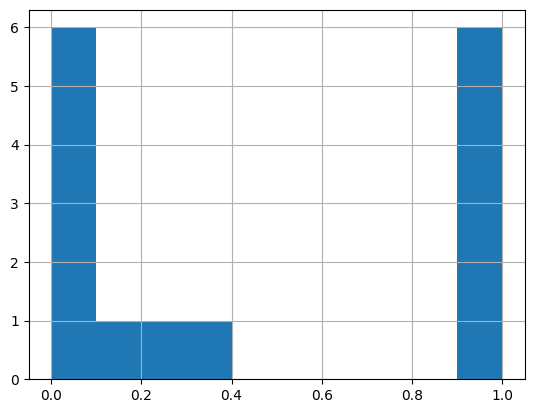

In [9]:
DF["predicted_difficulty_sigmoid"].hist()

In [10]:
params = SamplingParams(
            temperature=0.0,
            max_tokens=3000
        )

In [11]:
PROMPTS = DF["formatted_prompt"].tolist()

In [12]:
llm = LLM(model=MODEL_NAME, gpu_memory_utilization=0.6)

INFO 12-15 22:34:34 [utils.py:326] non-default args: {'model': 'Qwen/Qwen2.5-Math-7B-Instruct', 'gpu_memory_utilization': 0.6, 'disable_log_stats': True}


INFO 12-15 22:34:45 [__init__.py:711] Resolved architecture: Qwen2ForCausalLM


`torch_dtype` is deprecated! Use `dtype` instead!


INFO 12-15 22:34:45 [__init__.py:1750] Using max model len 4096


2025-12-15 22:34:46,577	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


INFO 12-15 22:34:46 [scheduler.py:222] Chunked prefill is enabled with max_num_batched_tokens=16384.
(EngineCore_0 pid=1819130) INFO 12-15 22:34:47 [core.py:636] Waiting for init message from front-end.
(EngineCore_0 pid=1819130) INFO 12-15 22:34:47 [core.py:74] Initializing a V1 LLM engine (v0.10.1.1) with config: model='Qwen/Qwen2.5-Math-7B-Instruct', speculative_config=None, tokenizer='Qwen/Qwen2.5-Math-7B-Instruct', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config={}, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, device_config=cuda, decoding_config=DecodingConfig(backend='auto', disable_fallback=False, disable_any_whitespace=False, disable_additional_properties=False, reasoning_backend=''), observability_config=Observability

Loading safetensors checkpoint shards:   0% Completed | 0/4 [00:00<?, ?it/s]
Loading safetensors checkpoint shards:  25% Completed | 1/4 [00:00<00:02,  1.43it/s]
Loading safetensors checkpoint shards:  50% Completed | 2/4 [00:01<00:01,  1.33it/s]
Loading safetensors checkpoint shards:  75% Completed | 3/4 [00:02<00:00,  1.32it/s]
Loading safetensors checkpoint shards: 100% Completed | 4/4 [00:02<00:00,  1.36it/s]
Loading safetensors checkpoint shards: 100% Completed | 4/4 [00:02<00:00,  1.36it/s]
(EngineCore_0 pid=1819130) 


(EngineCore_0 pid=1819130) INFO 12-15 22:34:55 [default_loader.py:262] Loading weights took 3.07 seconds
(EngineCore_0 pid=1819130) INFO 12-15 22:34:56 [gpu_model_runner.py:2007] Model loading took 14.2419 GiB and 4.070991 seconds
(EngineCore_0 pid=1819130) INFO 12-15 22:35:02 [backends.py:548] Using cache directory: /home/lina4335/.cache/vllm/torch_compile_cache/4858120f0f/rank_0_0/backbone for vLLM's torch.compile
(EngineCore_0 pid=1819130) INFO 12-15 22:35:02 [backends.py:559] Dynamo bytecode transform time: 5.62 s
(EngineCore_0 pid=1819130) INFO 12-15 22:35:06 [backends.py:161] Directly load the compiled graph(s) for dynamic shape from the cache, took 4.282 s
(EngineCore_0 pid=1819130) INFO 12-15 22:35:07 [monitor.py:34] torch.compile takes 5.62 s in total
(EngineCore_0 pid=1819130) INFO 12-15 22:35:08 [gpu_worker.py:276] Available KV cache memory: 27.55 GiB
(EngineCore_0 pid=1819130) INFO 12-15 22:35:08 [kv_cache_utils.py:849] GPU KV cache size: 515,840 tokens
(EngineCore_0 pid=18

Capturing CUDA graphs (mixed prefill-decode, PIECEWISE): 100%|██████████| 67/67 [00:06<00:00, 10.44it/s]


(EngineCore_0 pid=1819130) INFO 12-15 22:35:15 [gpu_model_runner.py:2708] Graph capturing finished in 7 secs, took 0.64 GiB
(EngineCore_0 pid=1819130) INFO 12-15 22:35:15 [core.py:214] init engine (profile, create kv cache, warmup model) took 19.43 seconds
INFO 12-15 22:35:16 [llm.py:298] Supported_tasks: ['generate']


In [13]:
batch_outputs = llm.generate(PROMPTS, params)

Processed prompts: 100%|██████████| 15/15 [00:50<00:00,  3.39s/it, est. speed input: 34.58 toks/s, output: 439.12 toks/s]


In [14]:
responses = []
token_lengths = []
individual_correct = []
ground_truth = DF["answer"].tolist()

for idx, output in enumerate(batch_outputs):
    response = output.outputs[0].text
    token_length = len(output.outputs[0].token_ids)
    responses.append(response)
    token_lengths.append(token_length)
    
    # Check individual correctness
    parsed = parse_answers([response])
    if parsed and len(parsed[0]) > 0:
        answer = parsed[0][0]
        correct = verify(parse(f"${ground_truth[idx]}$"), answer)
        individual_correct.append(correct)
    else:
        individual_correct.append(False)

In [15]:
individual_correct

[True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [ ]:
sum(individual_correct)/len(individual_correct) #7B RESULTS

0.06666666666666667

In [27]:
# LOOKING AT THE QUESTION WE FAIL
REVERTED_IDX = 5
print("token lengths: ",token_lengths[REVERTED_IDX])
print(responses[REVERTED_IDX])

token lengths:  3000
 Given an isosceles trapezoid with an inscribed circle, we know that the sum of the lengths of the opposite sides must be equal. Let the lengths of the parallel sides be \( r \) and \( s \) (with \( r \neq s \)), and the lengths of the non-parallel sides be \( a \). Since the circle is inscribed, we have:

\[ r + s = 2a \]

The area \( A \) of the trapezoid can also be expressed in terms of the radius \( r_c \) of the inscribed circle and the perimeter \( P \) of the trapezoid. The radius of the circle is given as 3, and the area is given as 72. The perimeter \( P \) is:

\[ P = r + s + 2a = 4a \]

The area \( A \) is given by:

\[ A = r_c \cdot P = 3 \cdot 4a = 12a \]

Since the area is 72, we can set up the equation:

\[ 12a = 72 \]

Solving for \( a \), we get:

\[ a = 6 \]

Now, substituting \( a = 6 \) back into the equation \( r + s = 2a \), we get:

\[ r + s = 2 \cdot 6 = 12 \]

Next, we need to find \( r^2 + s^2 \). We can use the identity:

\[ r^2 + s^2 = 

In [ ]:
ground_truth[REVERTED_IDX] ## We get the answer wrong here for some reason.

504

In [ ]:
individual_correct # 1.5B RESULTS:
# [True, False, False, False, False, True, False, False, False, False, False, False, False, False, False]

[True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [ ]:
sum(individual_correct)/len(individual_correct) #1.5B RESULTS:

0.13333333333333333